# Data Sprint 3 (Abalone Dataset Study)

**Disclaimer- I have tried to recreate all the steps taken but several other attempts were made which I couldn't document.**

   * I tried *log transformation* of the Rings column which reduced the RMSE on testing set but didn't improve much in the testing predictions.
    * Also, Outlier detection was done on the whole dataset which gave me my 2nd best rmse score of 2.07 on the test dataset but hasn't been included in this file.
    * As can be seen from the heatmap, some columns were correlated to other columns
        * Length, Diameter and Height are highly correlated
        * Whole weight is the sum of the other weights 
        * Also, male and female distributions are similar and were joined to create only 2 variables- infant and non infant.
     * *Unfortunately, removing these columns didn't improve the performance for Random Forest Regressor. I will need to understand the underlying maths more.*

### Importing the necessary libraries for EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
#Read the dataset
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

In [3]:
# Getting an overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [4]:
# Description of the basic statistics of the dataset
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


### Histogram of the complete dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024685D3FC70>,
      dtype=object)

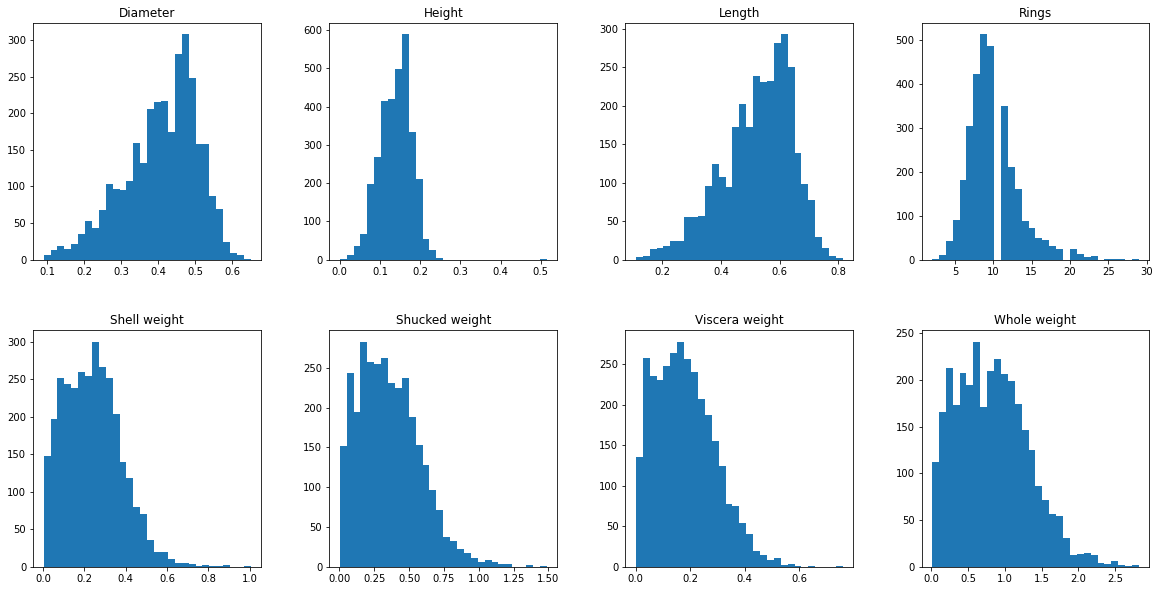

In [16]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

 **Key Insights**
        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range

### Skewness Degree

In [12]:
from scipy.stats import skew
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
7,Rings,1.131288
4,Shucked weight,0.723449
6,Shell weight,0.618929
5,Viscera weight,0.612892
3,Whole weight,0.546417
2,Height,0.037339
1,Diameter,-0.603599
0,Length,-0.636292


### Total count by sex

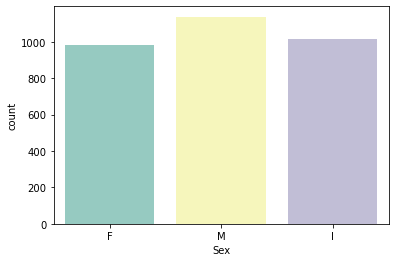

In [17]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

### Understanding the distribution according to Rings

In [7]:
data.groupby('Rings')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']].mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,
2,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,0.172727,0.126818,0.040000,0.028318,0.011636,0.006455,0.008909
4,0.220952,0.160952,0.055119,0.058524,0.024262,0.012964,0.017869
5,0.288483,0.211798,0.070562,0.129798,0.061680,0.028348,0.037483
6,0.368453,0.278204,0.092072,0.273199,0.124395,0.058881,0.076066
7,0.417187,0.317730,0.104819,0.384998,0.176771,0.082758,0.108105
8,0.499563,0.386147,0.127116,0.643342,0.294872,0.139149,0.179736
9,0.549230,0.427135,0.143236,0.860465,0.392460,0.189006,0.239174
10,0.574641,0.449815,0.154435,1.013963,0.448994,0.225064,0.285657


### Visualize all interactions between the terms

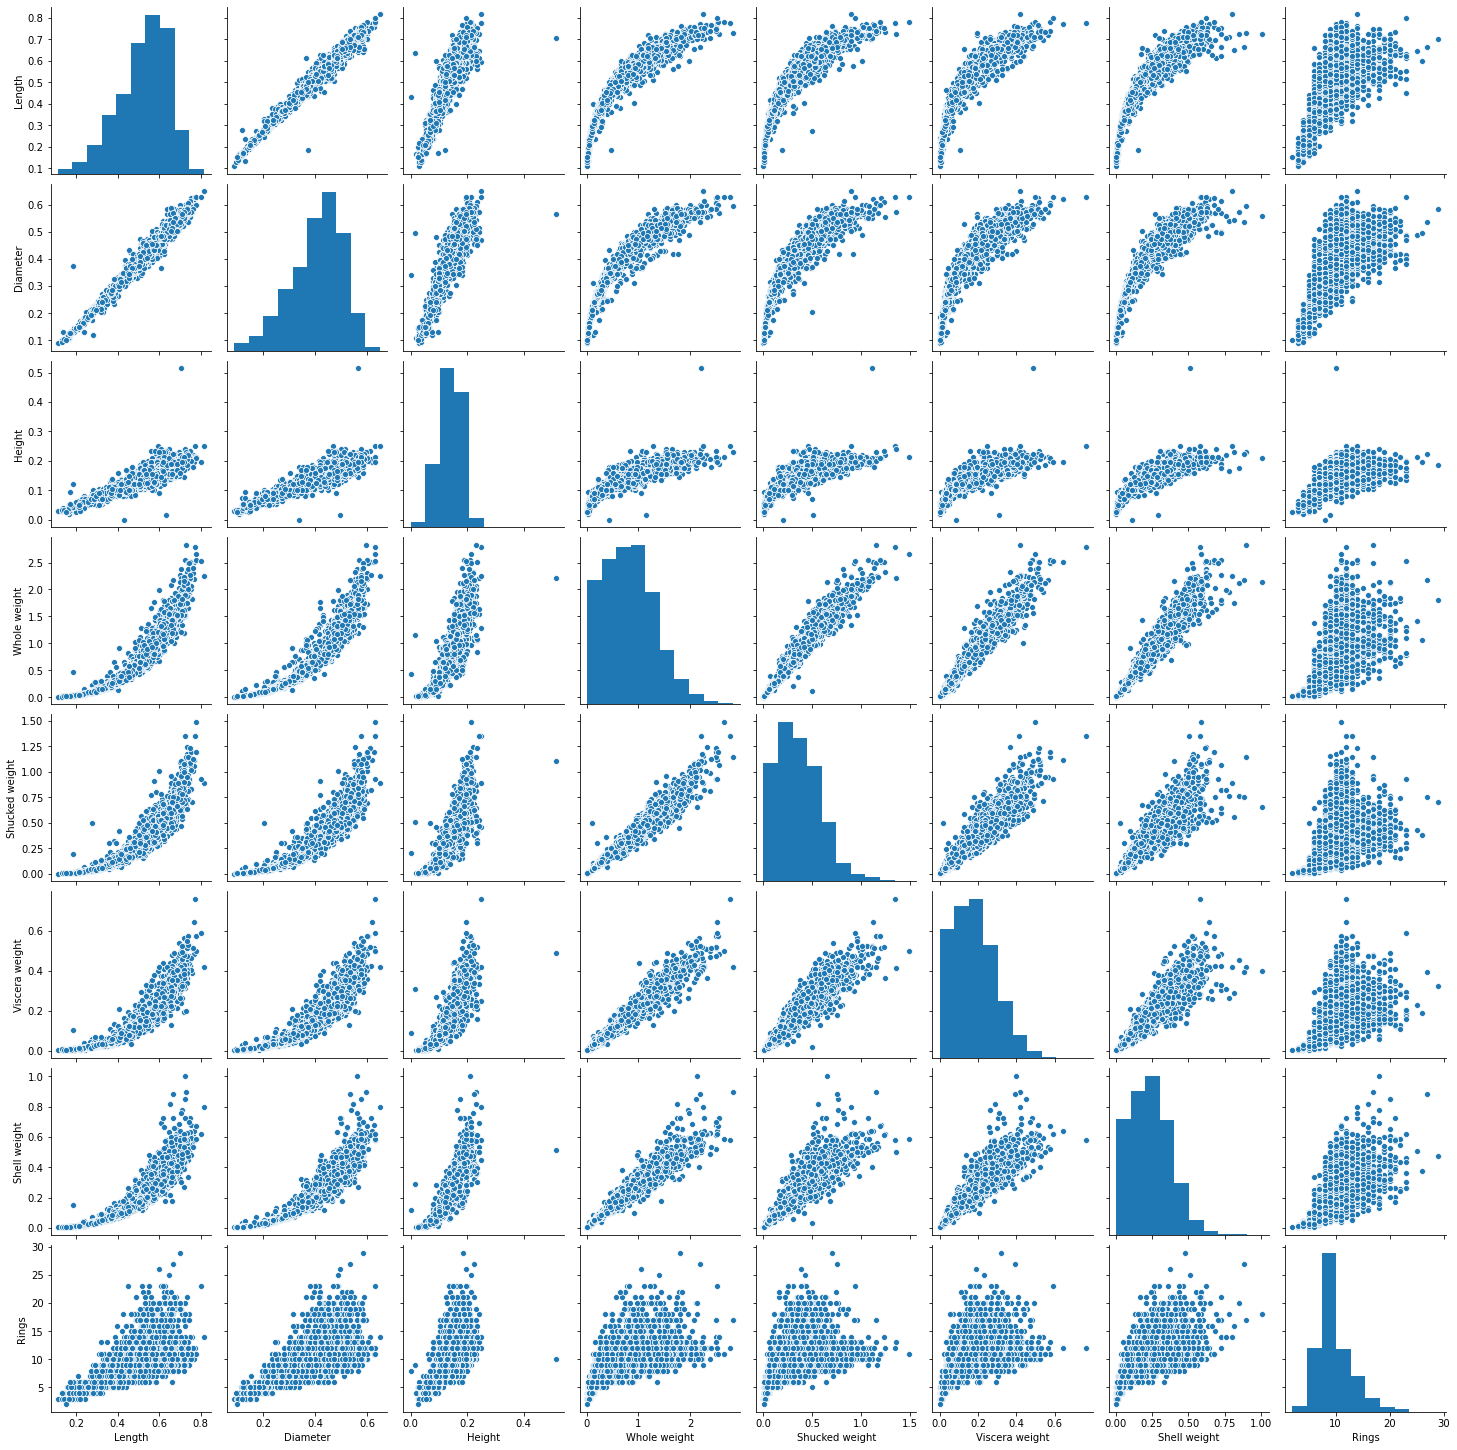

In [18]:
sns.pairplot(data)

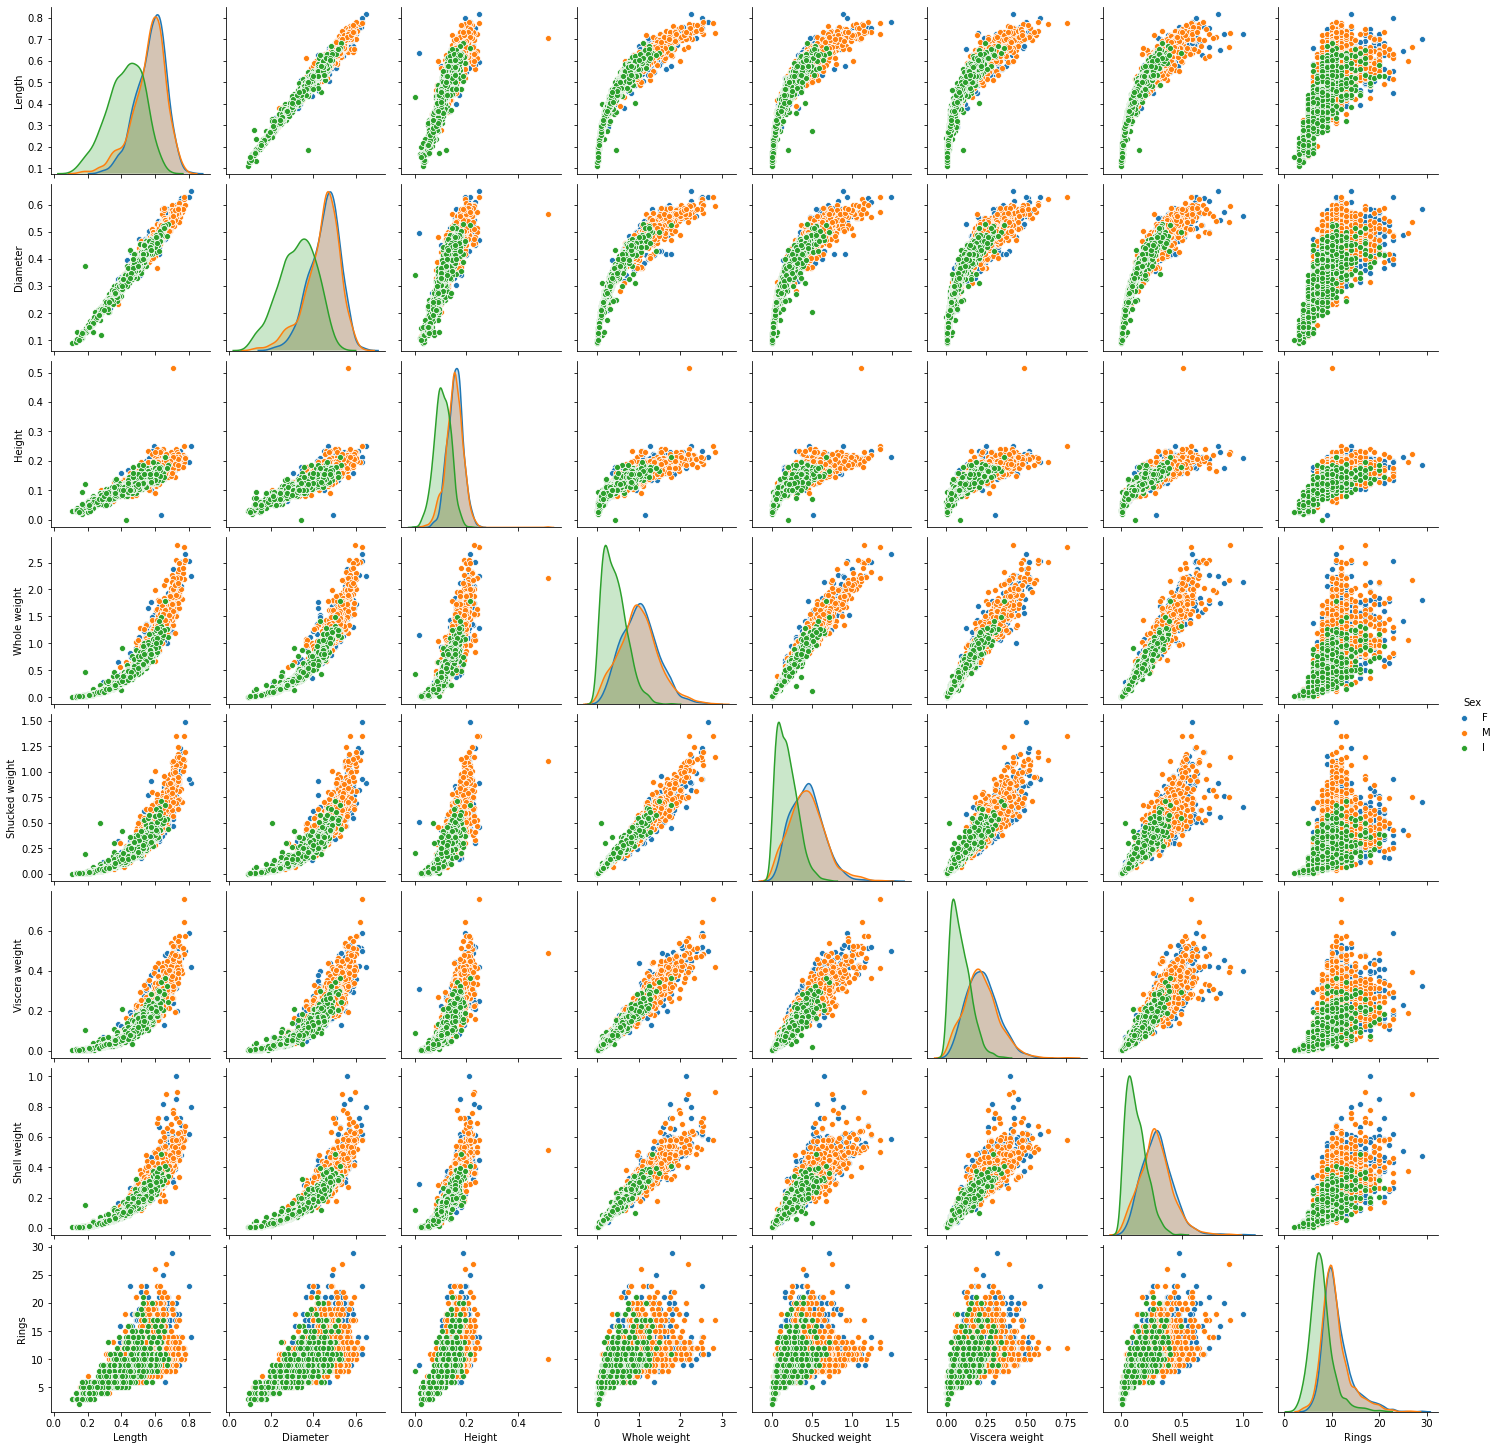

In [93]:
sns.pairplot(data,hue='Sex')

In [19]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].mean().sort_values('Rings')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
I,0.425903,0.325094,0.107438,0.427477,0.189413,0.091529,0.126365,7.860809
M,0.564925,0.442465,0.152755,1.006868,0.439529,0.219276,0.286892,10.779438
F,0.576886,0.453476,0.156519,1.036233,0.441432,0.228128,0.300260,11.138634


### Heatmap to see the correlation

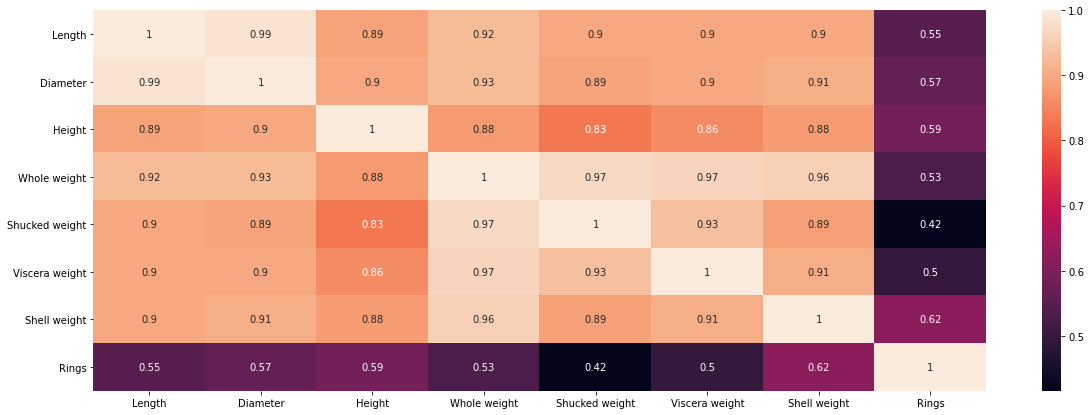

In [20]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

   **Whole Weight is almost linearly varying with all other features except age<br>
    Height has least linearity with remaining features<br>
    Rings is most linearly proprtional with Shell Weight followed by Diameter and length<br>
    Rings is least correlated with Shucked Weight**

### Outlier Handling

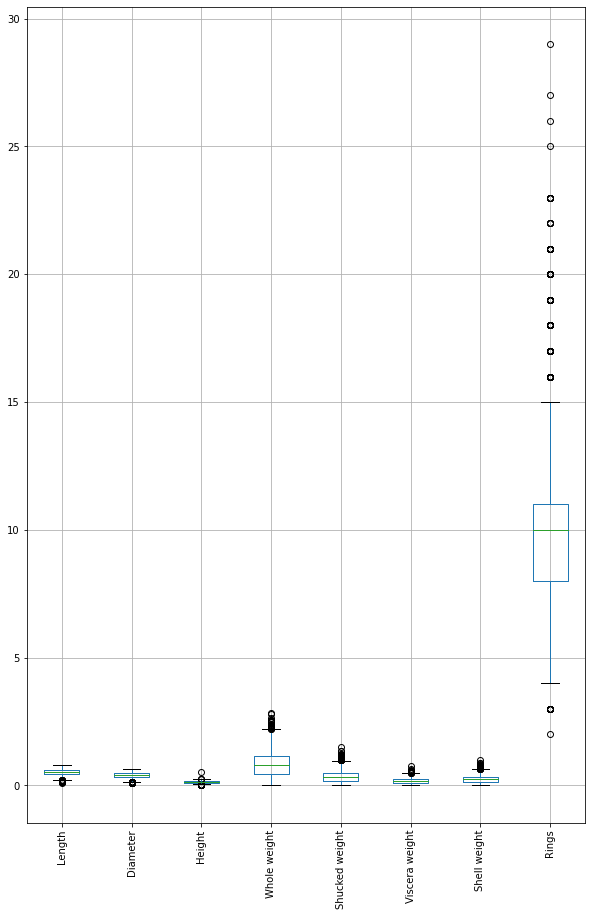

In [25]:
data.boxplot( rot = 90, figsize=(10,15))

In [26]:
from scipy import stats

In [28]:
from collections import Counter
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        
        #IQR calculation
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q3 + (outlier_step)
        
        #Outlier detection                                    #Outlier indexes
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        #Store indexes
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    # number of outliers
    # If we have more then 2 outliers in a sample, this sample ll be drop
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2 )
    #we are taking indexes
    
    return multiple_outliers

### Outlier Detection on Male data

In [27]:
data_male=data[data['Sex']=='M']
data_male.shape

(1138, 9)

In [29]:
male_outliers=detection(data_male,[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [30]:
data_male.loc[male_outliers]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
245,M,0.290,0.230,0.075,0.1165,0.0430,0.0255,0.0400,7
644,M,0.195,0.145,0.050,0.0320,0.0100,0.0080,0.0120,4
674,M,0.200,0.140,0.055,0.0350,0.0145,0.0080,0.0100,5
811,M,0.275,0.205,0.070,0.0940,0.0335,0.0200,0.0325,5
1017,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,7
1018,M,0.310,0.235,0.060,0.1200,0.0415,0.0330,0.0400,11
1027,M,0.260,0.200,0.065,0.0960,0.0440,0.0270,0.0300,6
1153,M,0.325,0.240,0.075,0.1550,0.0475,0.0355,0.0600,9
1351,M,0.270,0.195,0.070,0.1060,0.0465,0.0180,0.0360,7
1585,M,0.255,0.180,0.065,0.0790,0.0340,0.0140,0.0250,5


In [31]:
data_male=data_male.drop(male_outliers,axis=0).reset_index(drop = True) 

In [32]:
# After outlier removal
data_male.shape

(1104, 9)

### Outlier Detection for Female Data

In [35]:
data_female=data[data['Sex']=='F']
data_female.shape

(981, 9)

In [34]:
female_outliers=detection(data_female,[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [36]:
data_female.loc[female_outliers]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1301,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.0450,7
1854,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.0400,5
1878,F,0.335,0.220,0.070,0.1700,0.0760,0.0365,0.0500,6
2486,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.0350,6
2871,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.0250,5
1474,F,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14
986,F,0.750,0.610,0.235,2.5085,1.2320,0.5190,0.6120,14
20,F,0.705,0.560,0.205,2.3810,0.9915,0.5005,0.6240,10
897,F,0.755,0.625,0.210,2.5050,1.1965,0.5130,0.6785,11
908,F,0.750,0.570,0.210,2.2360,1.1090,0.5195,0.5450,11


In [37]:
data_female=data_female.drop(female_outliers,axis=0).reset_index(drop = True) 

In [38]:
#After outlier detection
data_female.shape

(969, 9)

### Outlier Detection for Infant Data

In [41]:
data_infant=data[data['Sex']=='I']
data_infant.shape

(1013, 9)

In [40]:
infant_outliers=detection(data_infant,[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [42]:
data_infant.loc[infant_outliers]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2380,I,0.660,0.525,0.215,1.7860,0.6725,0.3615,0.4065,11
73,I,0.635,0.500,0.165,1.4890,0.7150,0.3445,0.3615,13
105,I,0.625,0.460,0.160,1.2395,0.5500,0.2730,0.3800,14
1664,I,0.635,0.500,0.180,1.3190,0.5485,0.2920,0.4900,16
2187,I,0.670,0.485,0.175,1.2565,0.5355,0.3220,0.3860,9
2542,I,0.650,0.520,0.150,1.2380,0.5495,0.2960,0.3305,10
2706,I,0.630,0.505,0.180,1.2720,0.6025,0.2950,0.3150,11
2997,I,0.625,0.430,0.175,1.4110,0.5720,0.2970,0.3950,12


In [43]:
data_infant=data_infant.drop(infant_outliers,axis=0).reset_index(drop = True) 

In [44]:
#After outlier removal
data_infant.shape

(1005, 9)

### Merging all the dataframes back

In [45]:
data_new=data_male.append(data_female)

In [46]:
data_new=data_new.append(data_infant)

In [47]:
data_new.shape

(3078, 9)

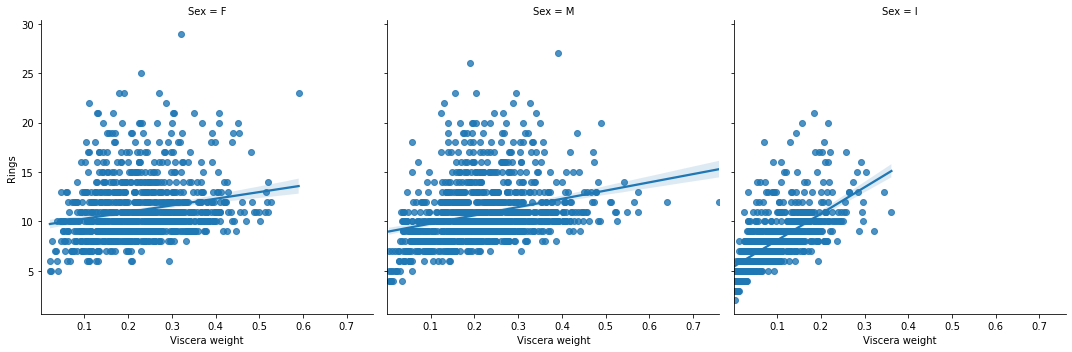

In [50]:
sns.lmplot('Viscera weight','Rings',data=data,col='Sex',order=1)

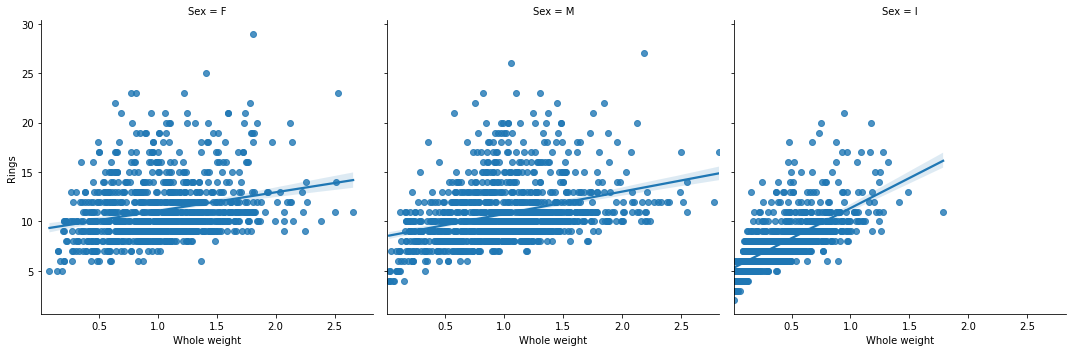

In [51]:
sns.lmplot('Whole weight','Rings',data=data,col='Sex',order=1)

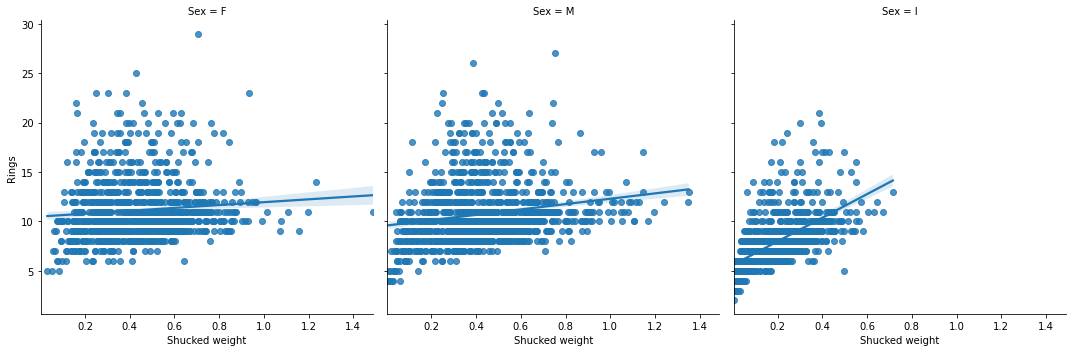

In [52]:
sns.lmplot('Shucked weight','Rings',data=data,col='Sex',order=1)

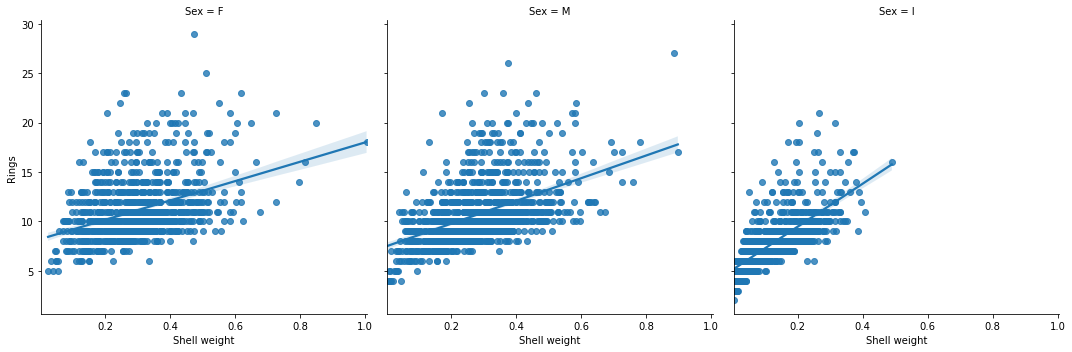

In [53]:
sns.lmplot('Shell weight','Rings',data=data,col='Sex',order=1)

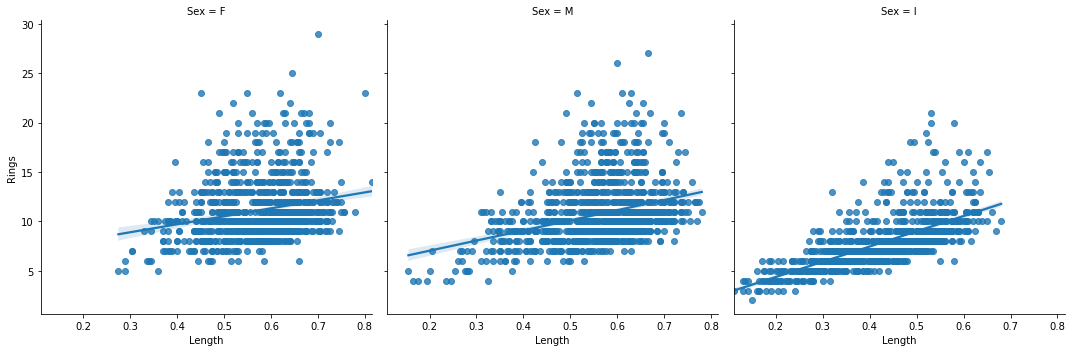

In [54]:
sns.lmplot('Length','Rings',data=data,col='Sex',order=1)

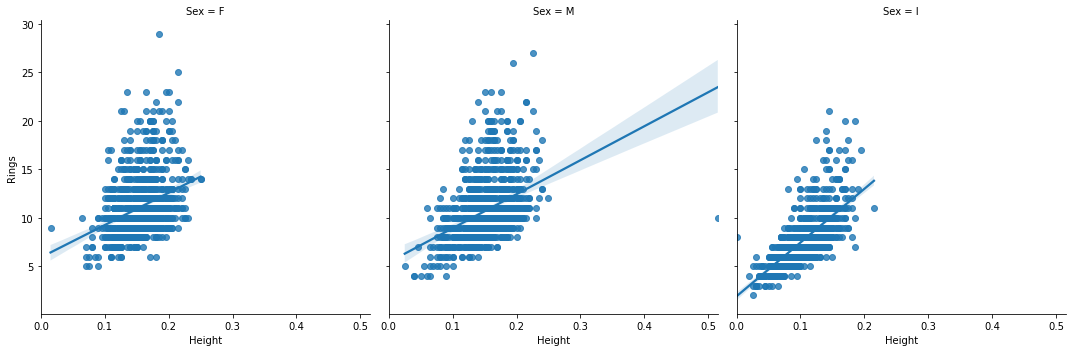

In [55]:
sns.lmplot('Height','Rings',data=data,col='Sex',order=1)

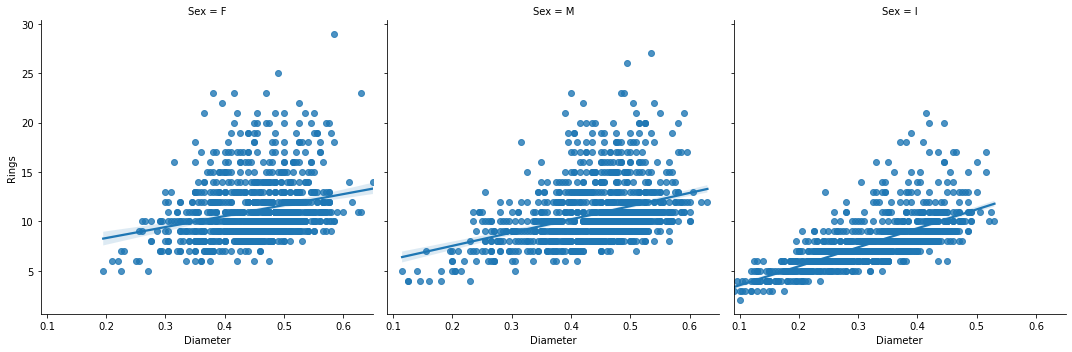

In [56]:
sns.lmplot('Diameter','Rings',data=data,col='Sex',order=1)

### Reset index

In [58]:
data_new.reset_index(drop=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18
1,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.3450,12
2,M,0.510,0.405,0.125,0.6925,0.3270,0.1550,0.1805,7
3,M,0.655,0.520,0.180,1.4920,0.7185,0.3600,0.3550,11
4,M,0.540,0.415,0.145,0.7400,0.2635,0.1680,0.2450,12
...,...,...,...,...,...,...,...,...,...
3073,I,0.310,0.240,0.090,0.1455,0.0605,0.0315,0.0450,7
3074,I,0.535,0.450,0.155,0.8075,0.3655,0.1480,0.2595,10
3075,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
3076,I,0.500,0.375,0.120,0.5420,0.2150,0.1160,0.1700,9


In [59]:
data=data_new

In [60]:
data = pd.get_dummies(data)
dummy_data = data.copy()

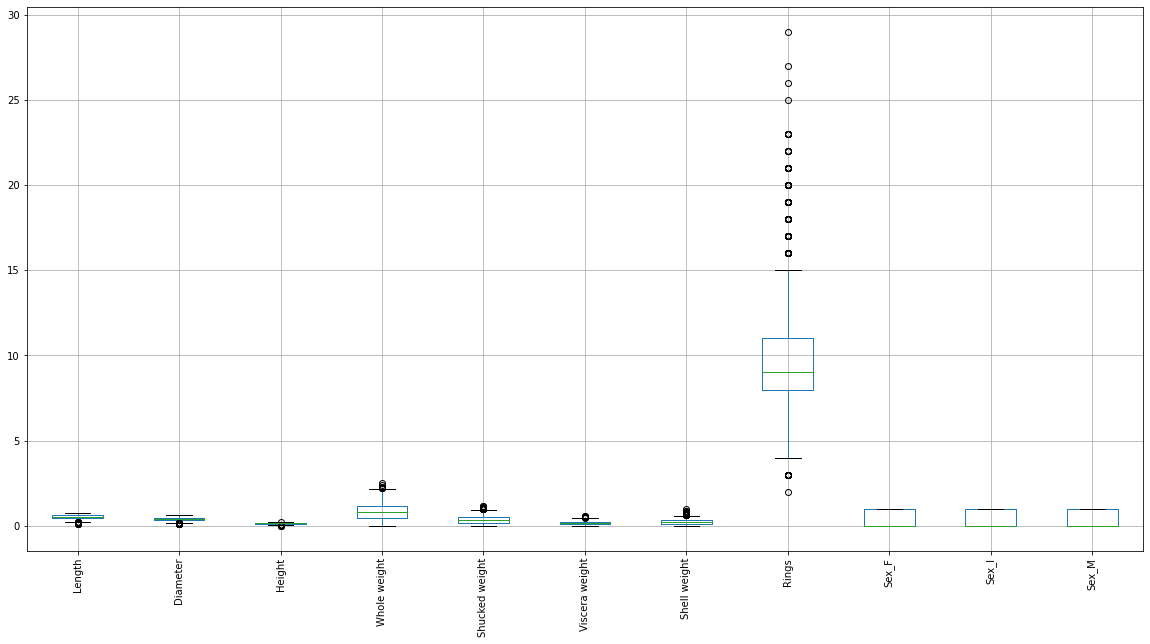

In [61]:
data.boxplot( rot = 90, figsize=(20,10))

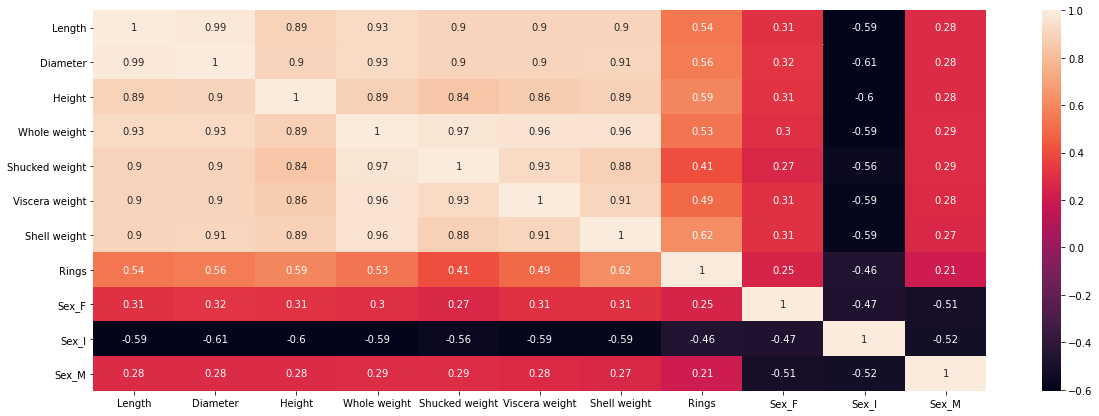

In [62]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

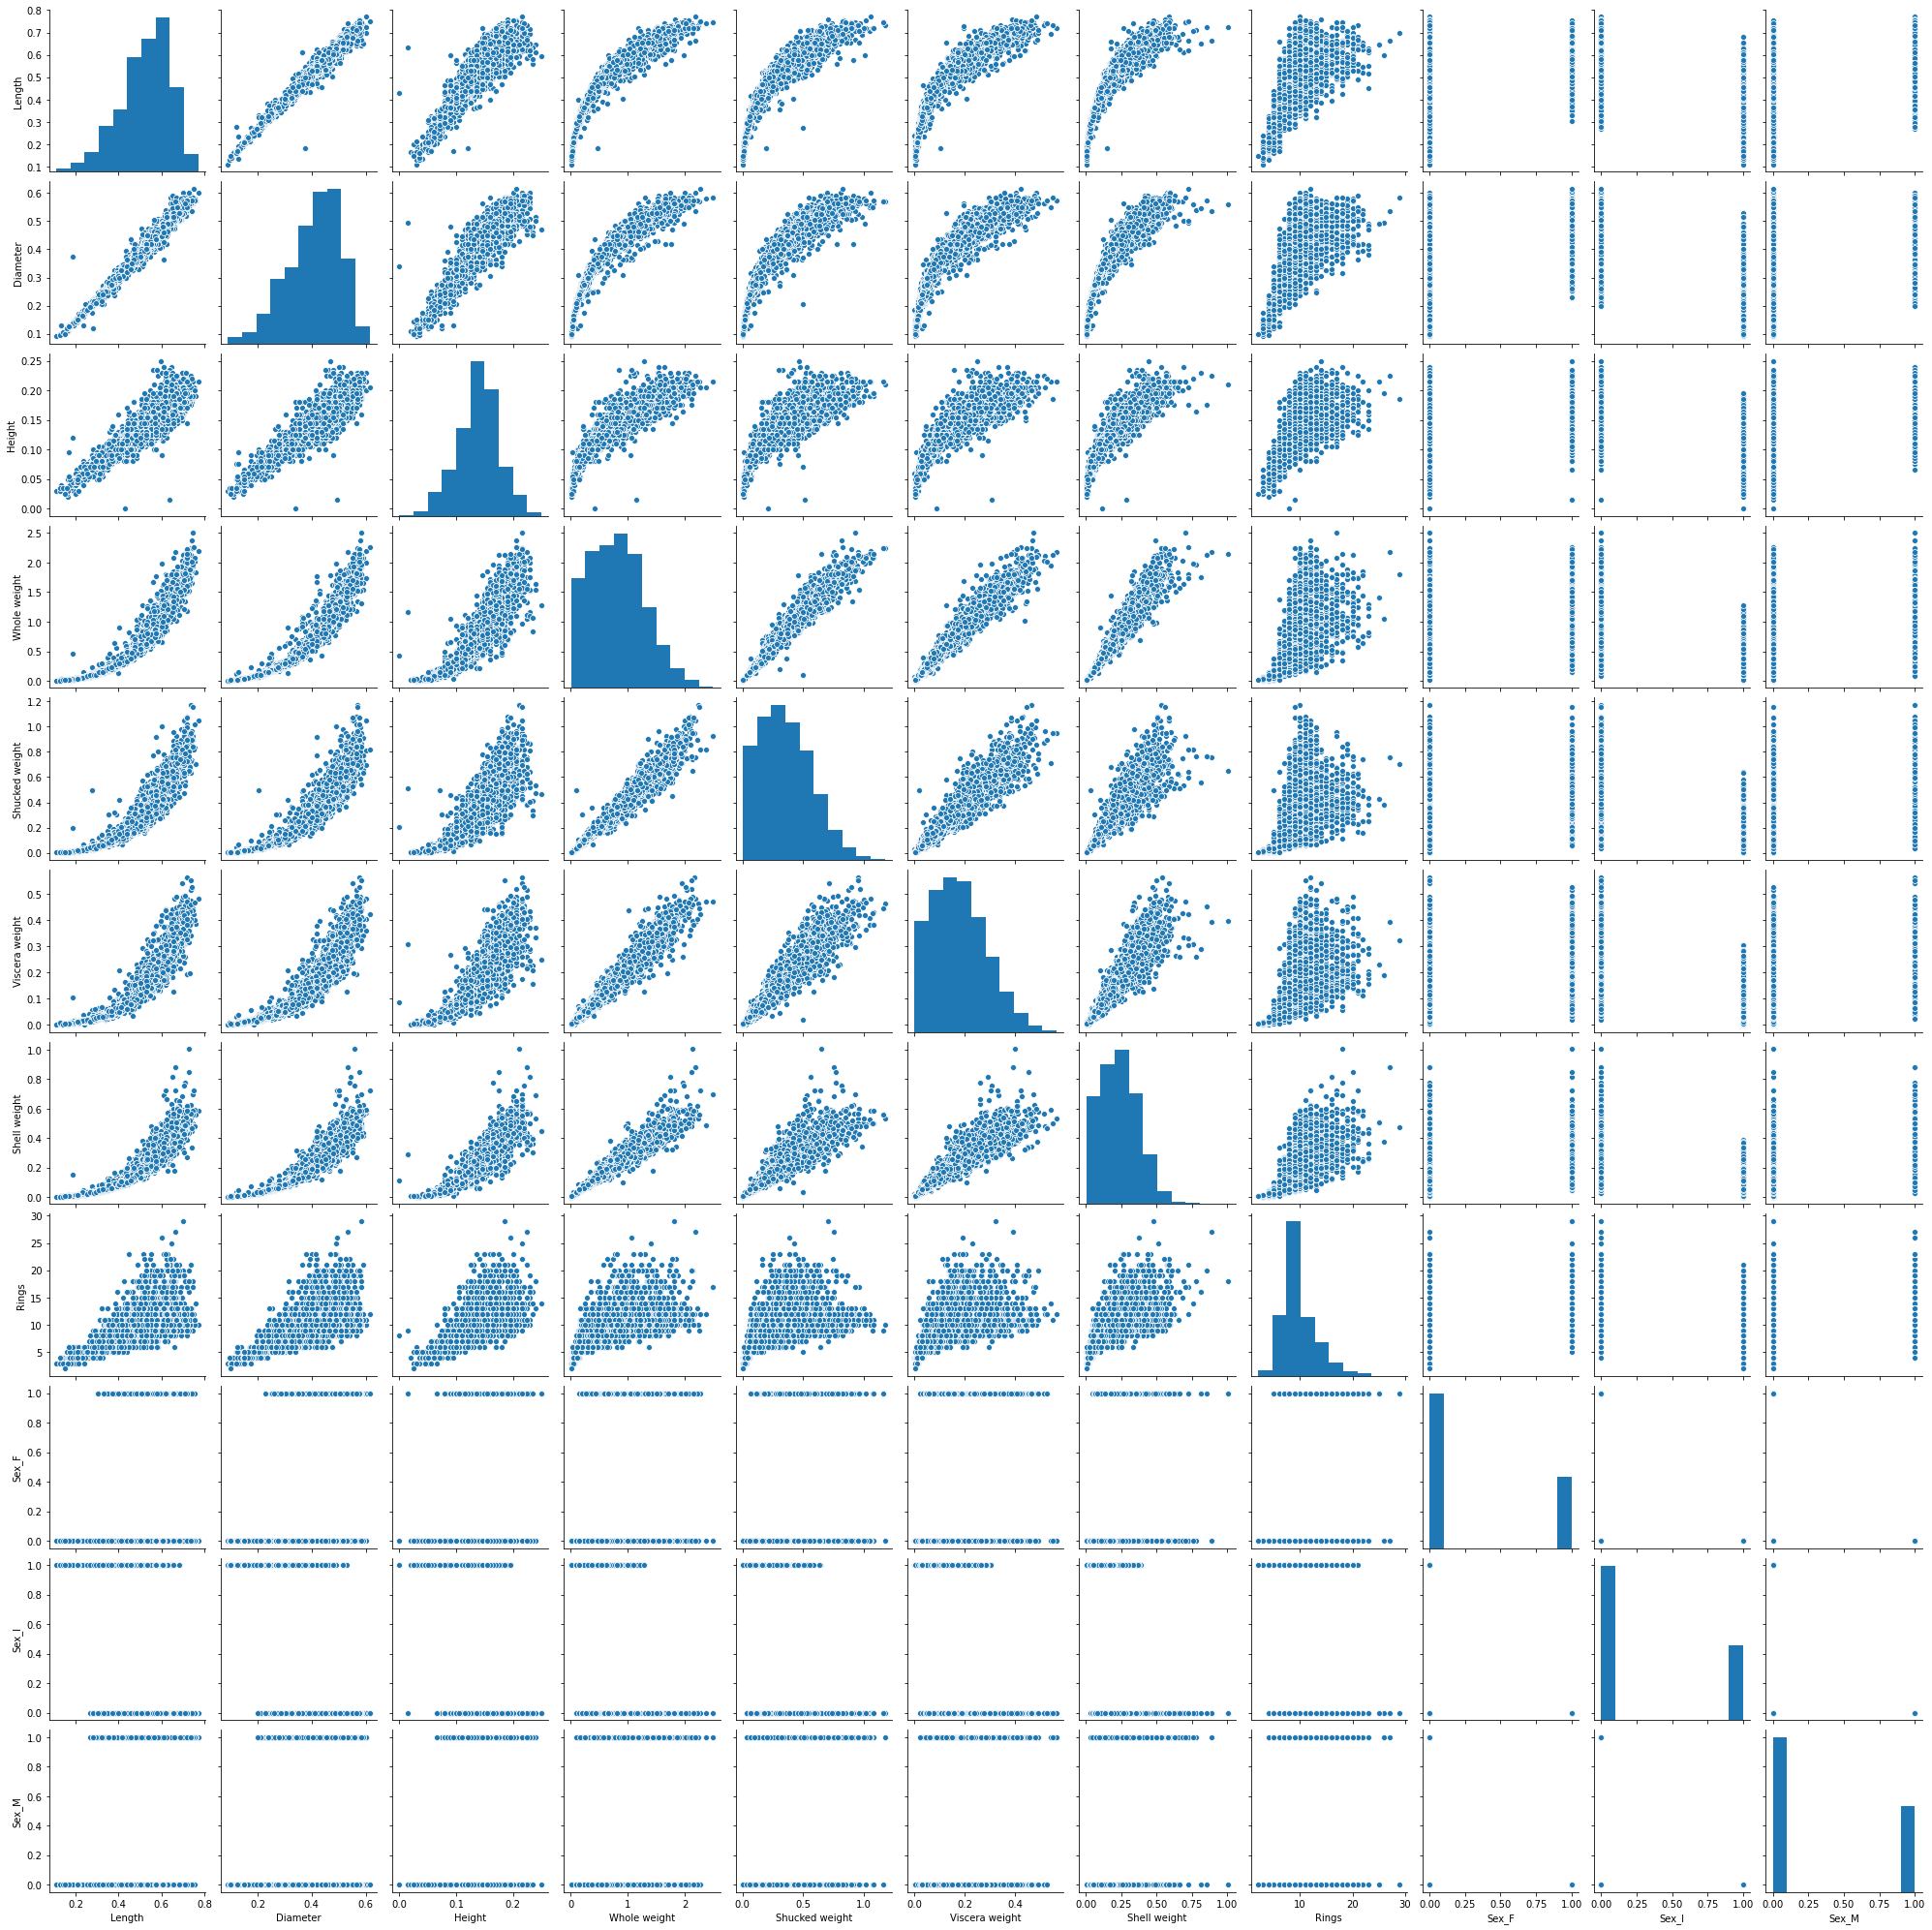

In [63]:
sns.pairplot(data)

### Applying ML method

In [64]:
# Input/independent variables
X = data.drop('Rings', axis = 1)   # here we are droping the Rings feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = data.Rings             # Output/Dependent variable

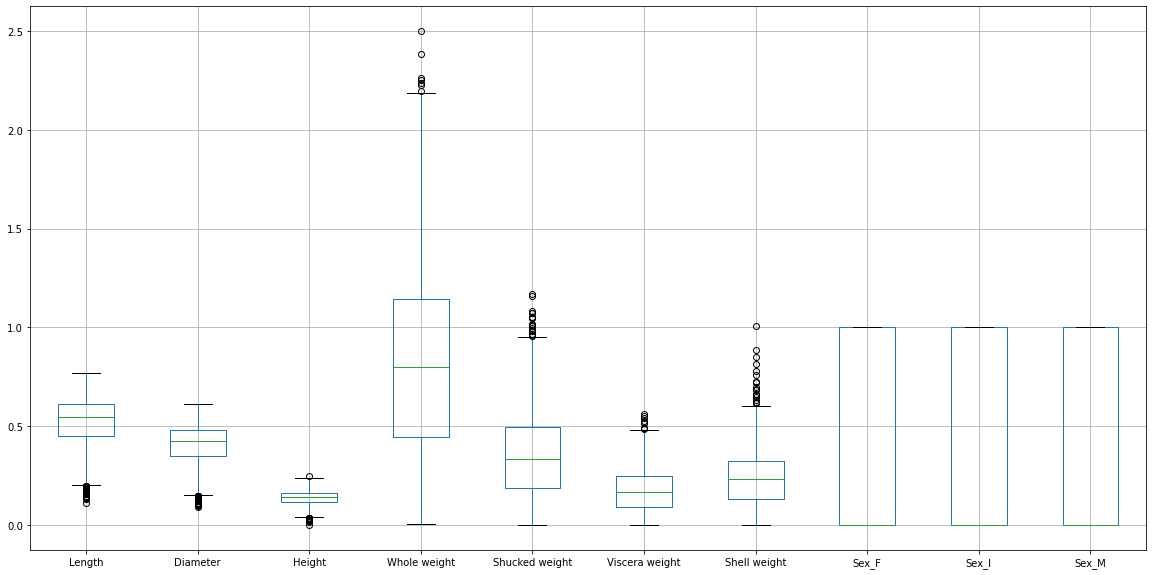

In [65]:
X.boxplot(figsize=(20,10))

In [66]:
from sklearn.feature_selection import SelectKBest
#from sklearn.preprocessing import  StandardScaler

In [67]:
#standardScale = StandardScaler()
#X_new=standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

In [68]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [69]:
print(X.shape) # Previous
print(X_new.shape) #K-best

(3078, 10)
(3078, 10)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25,random_state=0)

In [71]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 467.917343, 26.790929
Ridge    : 477.532596, 37.662124
svm    : 537.348343, 58.981408
GNB    : 471.775259, 43.377635
RF    : 478.947347, 47.101268
GB    : 536.655181, 46.775323


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred))) 

Root Mean Squared Error is:  2.1201819022671846


In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [83]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [84]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.6227 degrees.
Accuracy = 83.78%.


In [85]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.4807 degrees.
Accuracy = 85.26%.
Improvement of 1.77%.


In [305]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
        'max_depth': [50,60,70,80],
    'max_features': [5,6,7,8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [300, 400,500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [306]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

grid_accuracy = evaluate(best_grid,X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 13.6min finished


Model Performance
Average Error: 1.4326 degrees.
Accuracy = 85.29%.
Improvement of 1.45%.


In [307]:
grid_search.best_params_

{'max_depth': 80,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [87]:
pred = best_random.predict(X_test)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred))) 

Root Mean Squared Error is:  2.088837288957016


In [308]:
pred = best_grid.predict(X_test)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred))) 

Root Mean Squared Error is:  2.018437871748815


In [88]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
params={'max_depth': 80,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 400}
regr = BaggingRegressor(base_estimator=RandomForestRegressor(**params),
                         n_estimators=100, random_state=42,n_jobs=-1).fit(X_train, y_train)

In [89]:
pred=regr.predict(X_test)
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred))) 

Root Mean Squared Error is:  2.0880845344150494


In [90]:
ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred))) 

Root Mean Squared Error is:  2.1455982694001086


In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred))) 

Root Mean Squared Error is:  2.1269198797124234


### Predicting output

In [145]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')

In [146]:
test_data=pd.get_dummies(test_data)

In [147]:
target = regr.predict(test_data)

In [148]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission32.csv")      # the csv file will be saved locally on the same location where this notebook is located.

### Trying out some Classification models to check performance

In [ ]:
# Input/independent variables
X = data.drop('Rings', axis = 1)   # here we are droping the Rings feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = data.Rings             # Output/Dependent variable

In [114]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data
X_training, X_testing, y_training, y_testing = train_test_split(X,y,test_size=0.2, random_state = 42)

In [105]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

'''Classifiers'''
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [106]:
import time

def confusion_matrix(ypred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(confusion_matrix(y_test, ypred, labels=np.unique(y_test)), annot=True, fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=ax)
    print(classification_report(y_test,ypred))  
    Accuracy = accuracy_score(y_test, ypred)
    return Accuracy

#Linear SVC Model:
Cs = [0.01, 0.1, 0.5, 1, 1.5,2, 2.5, 3 ]
svc_clf = GridSearchCV(LinearSVC(), param_grid=dict(C=Cs), cv=5,verbose=1,n_jobs=-1)
start = time.time()
svc_clf.fit(X_training, y_training)    
print("Best cross-validation score: {:.2f}".format(svc_clf.best_score_))
print("Best parameters: ", svc_clf.best_params_)
print("Best estimator: ", svc_clf.best_estimator_)
svc_clf = svc_clf.best_estimator_
ypred_val_svc = svc_clf.predict(X_testing)
y_pred_test_svc = svc_clf.predict(X)
end =  time.time()
print('Time to train and predict in Linear SVC Model: {}'.format(end-start))
confusion_matrix(ypred_val_svc, y_testing)
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, y_pred_test_svc))) 

from sklearn.linear_model import SGDClassifier
#SGD Classifier
param_grid = {'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}
grid = GridSearchCV(SGDClassifier(epsilon=0.1), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
sgd = grid.best_estimator_
ypred_val_sgd   = sgd.predict(X_testing)
y_pred_test_sgd = sgd.predict(X)
end =  time.time()
print('Time to train and predict in Stochastic Gradient Descent Model: {}'.format(end-start))
confusion_matrix(ypred_val_sgd, y_testing)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


Best cross-validation score: 0.15
Best parameters:  {'alpha': 1}
Best estimator:  BernoulliNB(alpha=1, binarize=0.12, fit_prior=False)
Time to train and predict in Bernoulli Naive Bayes Model: 0.4727132320404053
              precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.23      1.00      0.37         7
           5       0.00      0.00      0.00        15
           6       0.34      0.59      0.43        51
           7       0.22      0.18      0.20        61
           8       0.24      0.29      0.27        75
           9       0.22      0.02      0.04        93
          10       0.00      0.00      0.00        93
          11       0.12      0.28      0.17        74
          12       0.09      0.36      0.15        44
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        18
          16       0.00      0.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.17828200972447325

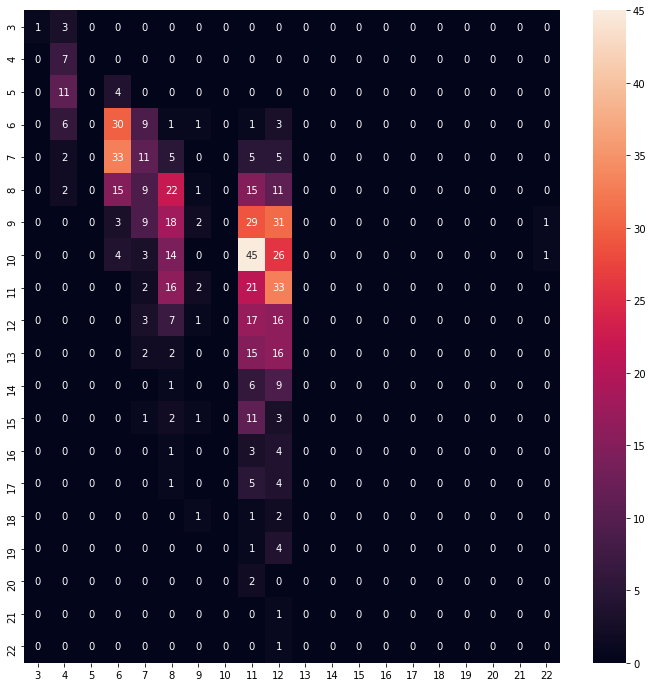

In [116]:
from sklearn.naive_bayes import BernoulliNB
#Bernoulli Naive Bayes
param_grid = {'alpha': [0.01, 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(BernoulliNB(fit_prior = False, binarize = 0.12), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
bnb = grid.best_estimator_
ypred_val_rc = bnb.predict(X_testing)
y_pred_test_rc=bnb.predict(X)
end =  time.time()
print('Time to train and predict in Bernoulli Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_rc, y_testing)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best cross-validation score: 0.22
Best parameters:  {'alpha': 0.05, 'fit_prior': True}
Best estimator:  MultinomialNB(alpha=0.05)
Time to train and predict in Multinominal Naive Bayes Model: 0.39925265312194824
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        51
           7       0.30      0.69      0.42        61
           8       0.21      0.17      0.19        75
           9       0.19      0.06      0.10        93
          10       0.20      0.81      0.32        93
          11       0.00      0.00      0.00        74
          12       0.00      0.00      0.00        44
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        18
          16       0.00      0.0

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.22042139384116693

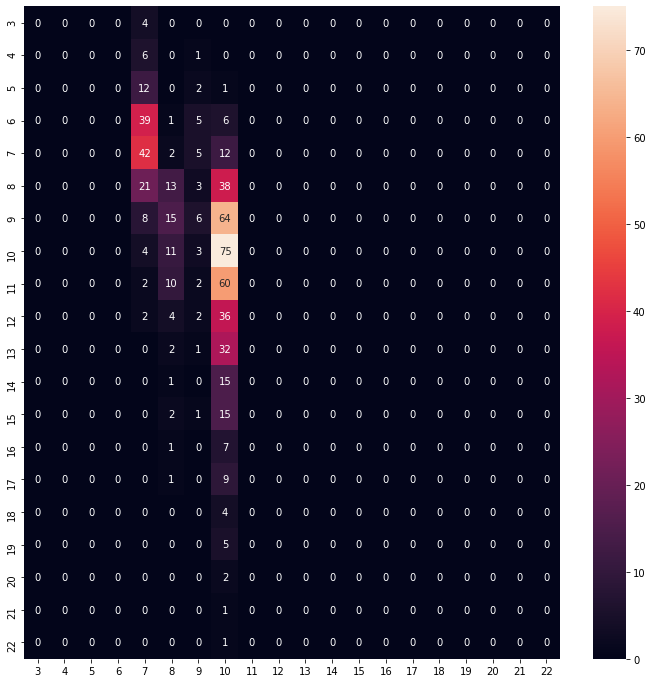

In [117]:

#Multinominal Naive Bayes Classifier:
param_grid = {
            'fit_prior': [True],
            'alpha': [0.05, 0.07, 0.08, 0.1, 0.15]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
mnb = grid.best_estimator_
ypred_val_mnb   = mnb.predict(X_testing)
y_pred_test_mnb = mnb.predict(X)
end =  time.time()
print('Time to train and predict in Multinominal Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_mnb, y_testing)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best cross-validation score: 0.18
Best parameters:  {'alpha': 0.4, 'fit_prior': True}
Best estimator:  ComplementNB(alpha=0.4)
Time to train and predict in Multinominal Naive Bayes Model: 0.23182463645935059
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        51
           7       0.22      0.72      0.33        61
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00        93
          10       0.16      0.32      0.21        93
          11       0.11      0.34      0.17        74
          12       0.00      0.00      0.00        44
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        18
          16       0.00      0.00  

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.16045380875202594

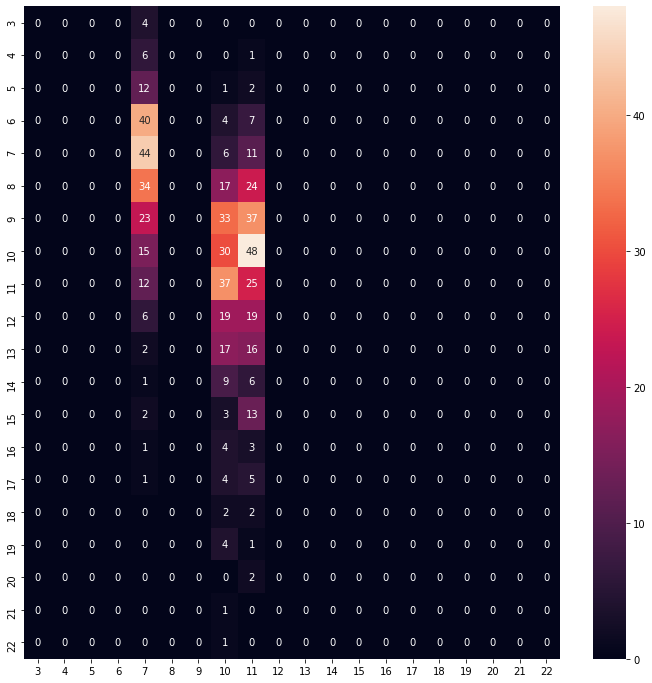

In [118]:
from sklearn.naive_bayes import ComplementNB
#Complement Naive Bayes Classifier:
param_grid = {
            'fit_prior': [True],
            'alpha': [0.4, 0.5, 0.6]}
grid = GridSearchCV(ComplementNB(), param_grid, cv=5,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
cnb = grid.best_estimator_
ypred_val_cnb   = cnb.predict(X_testing)
y_pred_test_cnb = cnb.predict(X)
end =  time.time()
print('Time to train and predict in Multinominal Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_cnb, y_testing)

Time to train and predict in OneVsRest Multinomial Naive Bayes Model: 6.130699157714844
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.43      0.38         7
           5       0.39      0.47      0.42        15
           6       0.32      0.22      0.26        51
           7       0.26      0.33      0.29        61
           8       0.23      0.27      0.25        75
           9       0.27      0.38      0.31        93
          10       0.21      0.30      0.25        93
          11       0.21      0.18      0.19        74
          12       0.16      0.11      0.13        44
          13       0.06      0.03      0.04        35
          14       0.00      0.00      0.00        16
          15       0.50      0.11      0.18        18
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


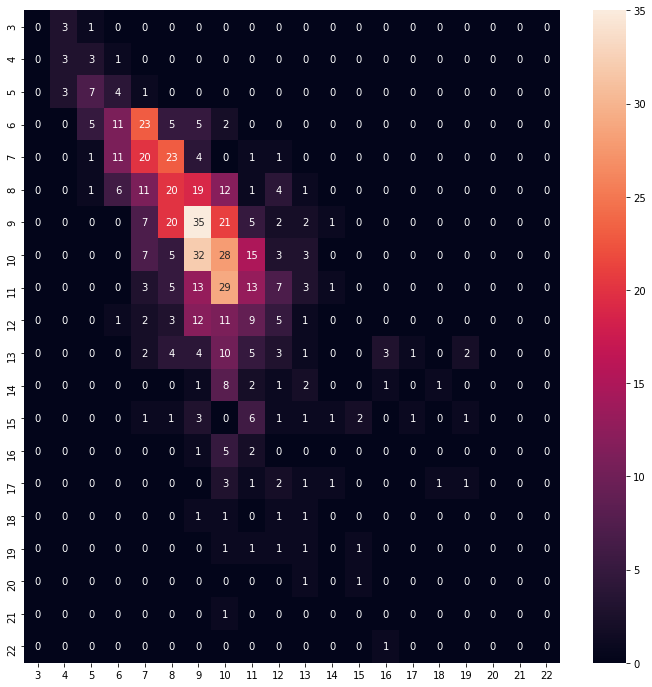

In [132]:
from sklearn.multiclass import OneVsRestClassifier
#OneVsRest Model:
ovr_mnb=OneVsRestClassifier(RandomForestClassifier(),n_jobs=-1)
start = time.time()
ovr_mnb.fit(X_training, y_training)    
ypred_val_ovrmnb = ovr_mnb.predict(X_testing)
y_pred_test_ovrmnb = ovr_mnb.predict(X)
end =  time.time()
print('Time to train and predict in OneVsRest Multinomial Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_ovrmnb, y_testing)
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, ypred_val_ovrmnb))) 

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
rfc = RandomForestClassifier()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.4081170139082175


In [127]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
rfc = AdaBoostClassifier()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.9613939509800336


In [128]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error
rfc = BaggingClassifier()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.5282840863704066


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
rfc = ExtraTreesClassifier()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
rfc = GradientBoostingClassifier()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.5477609580794223


In [122]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
rfc = MultinomialNB()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.7009212666823252


In [123]:
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
rfc = LinearSVC()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.5282840863704066


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
rfc = KNeighborsClassifier()
rfc.fit(X_training, y_training)
pred = rfc.predict(X_testing)

print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_testing, pred))) 

Root Mean Squared Error is:  2.7036202393648785
